# Predicting Car Prices using K-Nearest Neighbors

This work provides a walkthrough of data preparation, cleaning, modeling, and tuning to predict car prices.

The dataset can be downloaded here: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data, while the description can be found here: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names. 

The following shows the attributes:
<table>
  <th>
      Attribute               
  </th>
  <th>
      Attribute Range
  </th>
  <tr>
      <td>symboling</td>
      <td>-3, -2, -1, 0, 1, 2, 3</td>
  </tr>
  <tr>
      <td>normalized-losses</td>
      <td>continuous from 65 to 256</td>
  </tr>
  <tr>
      <td>make</td>
      <td>alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo</td> 
  </tr>
  <tr>
      <td>fuel-type</td>
      <td>diesel, gas</td>  
  </tr>
  <tr>
      <td>aspiration</td>
      <td>std, turbo</td>
  </tr>
  <tr>
      <td>num-of-doors</td>
      <td>four, two</td>
  </tr>
  <tr>
      <td>body-style</td>
      <td>hardtop, wagon, sedan, hatchback, convertible</td>
  <tr>
      <td>drive-wheels</td>
      <td>4wd, fwd, rwd</td>
  </tr>
  <tr>
      <td>engine-location</td>
      <td>front, rear</td>
  </tr>
  <tr>
      <td>wheel-base</td>
      <td>continuous from 86.6 to 120.9</td>
  </tr>
  <tr>
      <td>length</td>
      <td>continuous from 141.1 to 208.1</td>
  </tr>
  <tr>
      <td>width</td>
      <td>continuous from 60.3 to 72.3</td>
  </tr>
  <tr>
      <td>height</td>
      <td>continuous from 47.8 to 59.8</td>
  </tr>
  <tr>
      <td>curb-weight</td>
      <td>continuous from 1488 to 4066</td>
  </tr>
  <tr>
      <td>engine-type</td>
      <td>dohc, dohcv, l, ohc, ohcf, ohcv, rotor</td>
  </tr>
  <tr>
      <td>num-of-cylinders</td>
      <td>eight, five, four, six, three, twelve, two</td>
  </tr>
  <tr>
      <td>engine-size</td>
      <td>continuous from 61 to 326</td>
  </tr>
  <tr>
      <td>fuel-system</td>
      <td>1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi</td>
  </tr>
  <tr>
      <td>bore</td>
      <td>continuous from 2.54 to 3.94</td>
  </tr>
  <tr>
      <td>stroke</td>
      <td>continuous from 2.07 to 4.17</td>
  </tr>
  <tr>
      <td>compression-ratio</td>
      <td>continuous from 7 to 23</td>
  </tr>
  <tr>
      <td>horsepower</td>
      <td>continuous from 48 to 288</td>
  </tr>
  <tr>
      <td>peak-rpm</td>
      <td>continuous from 4150 to 6600</td>
  </tr>
  <tr>
      <td>city-mpg</td>
      <td>continuous from 13 to 49</td>
  </tr>
  <tr>
      <td>highway-mpg</td>
      <td>continuous from 16 to 54</td>
  </tr>
  <tr>
      <td>price</td>
      <td>continuous from 5118 to 45400</td>
  </tr>       
</table>

It is also helpful that we know the number of missing values denoted as  "?" in the following columns:
<table align='left'>
    <th>Column</th>
    <th>Number of Missing Values</th>
    <tr>
        <td>2</td>
        <td>41</td>
    </tr>
    <tr>
        <td>6</td>
        <td>2</td>
    </tr>
    <tr>
        <td>19</td>
        <td>4</td>
    </tr>
    <tr>
        <td>20</td>
        <td>4</td>
    </tr>
    <tr>
        <td>22</td>
        <td>2</td>
    </tr>
    <tr>
        <td>23</td>
        <td>2</td>
    </tr>
    <tr>
        <td>26</td>
        <td>4</td>
    </tr>
</table>

# Preparation and Cleaning

In [1]:
import pandas as pd

cars = pd.read_csv('import-85.data', names=['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',\
                                           'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base',\
                                           'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',\
                                           'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ration',\
                                           'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'])
cars.shape

(205, 26)

In [2]:
cars.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ration,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


We see that column 2 ('normalized-losses') has many missing values; 41 missing values to be exact, and so we will drop the column, making the total column 25, not 26 anymore.

In [3]:
cars_25cols = cars.drop('normalized-losses', axis=1)

In [4]:
cars_25cols.head(3)

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ration,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [5]:
cars_25cols.shape

(205, 25)

For the rest of the missing values, we will drop the rows that contain the missing values. To do this, we will find the cells that contain the "?" value and then just keep the ones that do not contain the "?" value.

In [6]:
cars_no_qmarks = cars_25cols[~cars_25cols.isin(["?"]).any(axis=1)]

In [7]:
cars_no_qmarks.shape

(193, 25)

In [8]:
# Check if column 'num-of-doors' still contain "?"

num_qmark = len(cars_no_qmarks[cars_no_qmarks['num-of-doors'] == '?'])
num_qmark

0

In [9]:
# Check column 'bore' if it still contains "?"
len(cars_no_qmarks[cars_no_qmarks['bore'] == "?"])

0

In [10]:
# Check column "stroke" if it contains "?"
len(cars_no_qmarks[cars_no_qmarks['stroke'] == "?"])

0

We will check the last three columns if they still contain the "?" values

In [11]:
len(cars_no_qmarks[cars_no_qmarks['horsepower'] == "?"])

0

In [12]:
len(cars_no_qmarks[cars_no_qmarks['peak-rpm'] == "?"])

0

In [13]:
len(cars_no_qmarks[cars_no_qmarks['price'] == "?"])

0

# Normalize Values

Now that all the missing values are handled, we will normalize the numeric values since the data contain various ranges of values. We focus on the numeric values because we will use the K-Nearest Neighbors algorithm, where we want to have meaningful numerical values to calculate distance. First we want to find which columns contain numeric values.

In [14]:
cars_no_qmarks.dtypes

symboling               int64
make                   object
fuel-type              object
aspiration             object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                   object
stroke                 object
compression-ration    float64
horsepower             object
peak-rpm               object
city-mpg                int64
highway-mpg             int64
price                  object
dtype: object

In [15]:
numeric_cols = ['symboling', 'wheel-base', 'length', 'width' ,'height', 'curb-weight',\
                'engine-size', 'compression-ration', 'city-mpg', 'highway-mpg']
normalized_cars = (cars_no_qmarks[numeric_cols] - cars_no_qmarks[numeric_cols].mean()) / cars_no_qmarks.std()

In [16]:
normalized_cars.shape

(193, 10)

In [17]:
normalized_cars['price'] = cars_no_qmarks['price'].astype('int64')
normalized_cars.head(3)

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ration,city-mpg,highway-mpg,price
0,1.782215,-1.678015,-0.442872,-0.83908,-2.117092,-0.025646,0.045098,-0.287525,-0.677292,-0.555613,13495
1,1.782215,-1.678015,-0.442872,-0.83908,-2.117092,-0.025646,0.045098,-0.287525,-0.677292,-0.555613,16500
2,0.163544,-0.719041,-0.250543,-0.18420,-0.613816,0.496473,0.574066,-0.287525,-0.990387,-0.702307,16500


In [18]:
normalized_cars['price'].dtype

dtype('int64')

# Univariate KNN: Default k value = 5

In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

def knn_train_test(col_name, df):
    if df[col_name].dtype != 'float64':
        print("Type Error. Please enter numeric values.")
        return
    elif col_name not in df.columns:
        print("Error. DataFrame does not contain column with such name.")
        return
    else:
        # We want train data to be 70% and test data 30%.
        cutoff_index = int(0.7 * df.shape[0])
        train_df = df.iloc[:cutoff_index]
        test_df = df.iloc[cutoff_index:]
        model = KNeighborsRegressor()
        model.fit(train_df[[col_name]], train_df['price'])#
        predictions = model.predict(test_df[[col_name]])
        mse = mean_squared_error(test_df['price'], predictions)
        rmse = np.sqrt(mse)
        return rmse
    

In [20]:
# We want to see which one of the numeric column generates the lowest rmse

lowest_rmse = None
lowest_col = None
rmses = list()
for col in numeric_cols:
    rmse = knn_train_test(col, normalized_cars)
    rmses.append(rmse)
    # Initialize lowest_rmse to the rmse from the first col 'symboling'
    if col == 'symboling':
        lowest_rmse = rmse
        lowest_col = col
    else:
        # Regular case: check if rmse is lower than lowest_rmse
        if rmse < lowest_rmse:
            lowest_rmse = rmse
            lowest_col = col
print("rmses: ", rmses)
print("lowest_rmse: ", lowest_rmse)
print("lowest_col: ", lowest_col)

rmses:  [8091.6635455561773, 6003.9979820346261, 6883.8329429328032, 2841.4592964009616, 7104.2794730869182, 2387.8725410737052, 3080.8687976406691, 7264.8189807763456, 3247.46910664608, 3073.1946919261004]
lowest_rmse:  2387.87254107
lowest_col:  curb-weight


The 'curb-weight' column seems to have the lowest RMSE with 2387.87254107. Now we want to see if using different k would generate different results.

# Univariate KNN: various k values

In [21]:
# We will modify the knn_train_test() function to add k as parameter

def knn_train_test(col_name, df, k):
    if df[col_name].dtype != 'float64':
        print("Type Error. Please enter numeric values.")
        return
    elif col_name not in df.columns:
        print("Error. DataFrame does not contain column with such name.")
        return
    else:
        # We want train data to be 70% and test data 30%.
        cutoff_index = int(0.7 * df.shape[0])
        train_df = df.iloc[:cutoff_index]
        test_df = df.iloc[cutoff_index:]
        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(train_df[[col_name]], train_df['price'])
        predictions = model.predict(test_df[[col_name]])
        mse = mean_squared_error(test_df['price'], predictions)
        rmse = np.sqrt(mse)
        return rmse

In [22]:
# Run the same routine in checking which column gives out the lowest rmse
# Create a dictionary of k values as key and another dictionary containing lowest col as key and lowest rmse as value

k_values = [1,2,3,4,5,6,7,8,9,10]
lowest_rmses = list()
k_lowest_rmse = dict()
lowest_rmse = None
lowest_col = None
rmses = list()
for k in k_values:
    for col in numeric_cols:
        rmse = knn_train_test(col, normalized_cars, k)
        rmses.append(rmse)
        # Initialize lowest_rmse to the rmse from the first col 'symboling'
        if col == 'symboling':
            lowest_rmse = rmse
            lowest_col = col
        else:
            # Regular case: check if rmse is lower than lowest_rmse
            if rmse < lowest_rmse:
                lowest_rmse = rmse
                lowest_col = col
    lowest_rmses.append(lowest_rmse)
    k_lowest_rmse[k] = {lowest_col: lowest_rmse}

print(k_lowest_rmse)

{1: {'curb-weight': 3460.3310211397506}, 2: {'curb-weight': 2323.0064293259402}, 3: {'curb-weight': 2419.6122623263423}, 4: {'curb-weight': 2413.3404621856434}, 5: {'curb-weight': 2387.8725410737052}, 6: {'curb-weight': 2499.3521769846079}, 7: {'curb-weight': 2546.961081678201}, 8: {'curb-weight': 2665.0263760158009}, 9: {'width': 2751.1240896595309}, 10: {'width': 2712.0437910333894}}


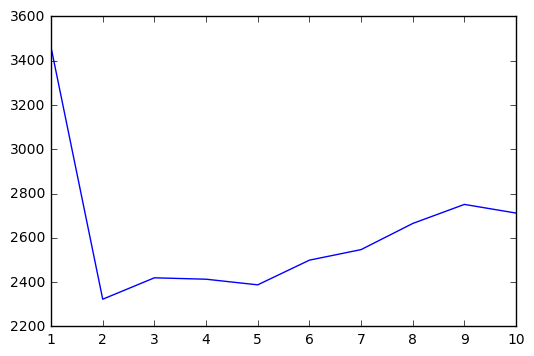

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_values, lowest_rmses)

We see that the optimal k value is 2, with rmse of 2323.0064293259402, generated using the 'curb-weight' feature.

# Multivariate KNN

In [24]:
# We are modifying the knn_train_test to accept multiple columns for training

def knn_train_test(col_names, df, k):
    for col in col_names:
        if df[col].dtype != 'float64':
            print("Type Error. Please enter numeric values.")
            return
        elif col not in df.columns:
            print("Error. DataFrame does not contain column with such name.")
            return
    # We want train data to be 70% and test data 30%.
    cutoff_index = int(0.7 * df.shape[0])
    train_df = df.iloc[:cutoff_index]
    test_df = df.iloc[cutoff_index:]
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(train_df[col_names], train_df['price'])
    predictions = model.predict(test_df[col_names])
    mse = mean_squared_error(test_df['price'], predictions)
    rmse = np.sqrt(mse)
    return rmse

# Using all columns

In [25]:
# We use all columns

k_values = [1,2,3,4,5,6,7,8,9,10]
lowest_rmses = list()
k_lowest_rmse = dict()
lowest_rmse = None
rmses = list()
for k in k_values:
    rmse = knn_train_test(numeric_cols, normalized_cars, k)
    rmses.append(rmse)
    # Initialize lowest_rmse to the rmse from the first k value
    if k == 1:
        lowest_rmse = rmse
    else:
        # Regular case: check if rmse is lower than lowest_rmse
        if rmse < lowest_rmse:
            lowest_rmse = rmse
    lowest_rmses.append(lowest_rmse)
    k_lowest_rmse[k] = lowest_rmse

print(k_lowest_rmse)

{1: 3372.0789734892442, 2: 3216.1367587312066, 3: 2647.5701992147656, 4: 2530.1894866515568, 5: 2304.4463553807423, 6: 2304.4463553807423, 7: 2264.5335243798249, 8: 2181.2030481064721, 9: 2012.3289631938867, 10: 1987.1537702765074}


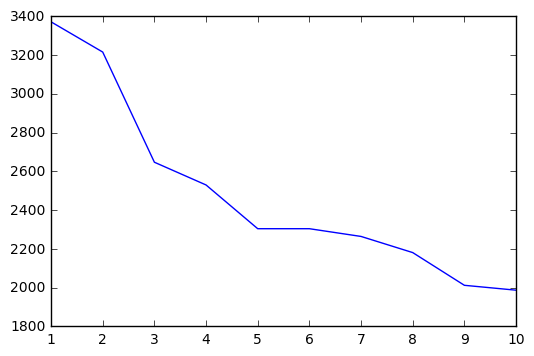

In [26]:
plt.plot(k_values, lowest_rmses)

It looks like using all columns generates an increasingly lower RMSE. We will increase the k values to see if it keeps getting lower.

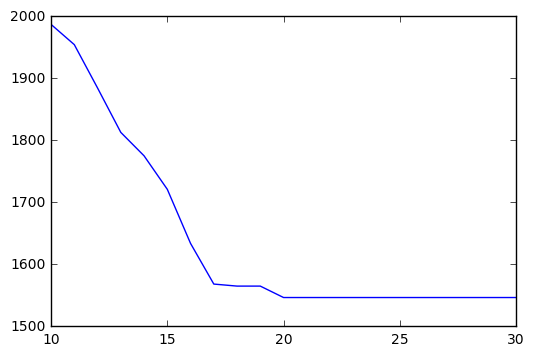

In [27]:
k_values = list(range(10,31))
lowest_rmses = list()
k_lowest_rmse = dict()
lowest_rmse = None
rmses = list()
for k in k_values:
    rmse = knn_train_test(numeric_cols, normalized_cars, k)
    rmses.append(rmse)
    # Initialize lowest_rmse to the rmse from the first k value
    if k == 10:
        lowest_rmse = rmse
    else:
        # Regular case: check if rmse is lower than lowest_rmse
        if rmse < lowest_rmse:
            lowest_rmse = rmse
    lowest_rmses.append(lowest_rmse)
    k_lowest_rmse[k] = lowest_rmse
    
plt.plot(k_values, lowest_rmses)

In [28]:
k_lowest_rmse

{10: 1987.1537702765074,
 11: 1954.5231078404674,
 12: 1884.5927651154959,
 13: 1812.9806248474447,
 14: 1775.2132165950322,
 15: 1721.1845465313679,
 16: 1633.8948697040305,
 17: 1568.3458112804356,
 18: 1565.0675654961037,
 19: 1565.0675654961037,
 20: 1546.6416642056738,
 21: 1546.6416642056738,
 22: 1546.6416642056738,
 23: 1546.6416642056738,
 24: 1546.6416642056738,
 25: 1546.6416642056738,
 26: 1546.6416642056738,
 27: 1546.6416642056738,
 28: 1546.6416642056738,
 29: 1546.6416642056738,
 30: 1546.6416642056738}

Here we see a saturation point where the RMSE goes flat at k = 20 and at the lowest at 1546.6416642056738.

# Using 2 features

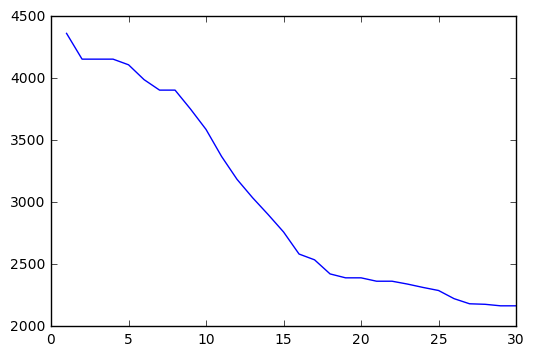

In [29]:
# We want to see if using only two columns that previously generated lowest RMSE would further lower the RMSE

k_values = list(range(1,31))

lowest_rmses = list()
k_lowest_rmse = dict()
lowest_rmse = None
rmses = list()
for k in k_values:
    rmse = knn_train_test(['curb-weight', 'width'], normalized_cars, k)
    rmses.append(rmse)
    # Initialize lowest_rmse to the rmse from the first k value
    if k == 1:
        lowest_rmse = rmse
    else:
        # Regular case: check if rmse is lower than lowest_rmse
        if rmse < lowest_rmse:
            lowest_rmse = rmse
    lowest_rmses.append(lowest_rmse)
    k_lowest_rmse[k] = lowest_rmse
    
plt.plot(k_values, lowest_rmses)

We see here that the lowest RMSE is still above 2000, which makes it higher than the lowest RMSE we got using all columns. But what if we incrase the k values? 

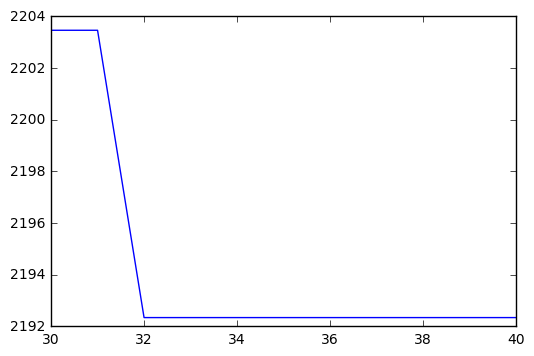

In [30]:
k_values = list(range(30, 41))

lowest_rmses = list()
k_lowest_rmse = dict()
lowest_rmse = None
rmses = list()
for k in k_values:
    rmse = knn_train_test(['curb-weight', 'width'], normalized_cars, k)
    rmses.append(rmse)
    # Initialize lowest_rmse to the rmse from the first k value
    if k == 30:
        lowest_rmse = rmse
    else:
        # Regular case: check if rmse is lower than lowest_rmse
        if rmse < lowest_rmse:
            lowest_rmse = rmse
    lowest_rmses.append(lowest_rmse)
    k_lowest_rmse[k] = lowest_rmse
    
plt.plot(k_values, lowest_rmses)

In [31]:
k_lowest_rmse

{30: 2203.4647283364875,
 31: 2203.4647283364875,
 32: 2192.3429246491432,
 33: 2192.3429246491432,
 34: 2192.3429246491432,
 35: 2192.3429246491432,
 36: 2192.3429246491432,
 37: 2192.3429246491432,
 38: 2192.3429246491432,
 39: 2192.3429246491432,
 40: 2192.3429246491432}

It looks like the RMSE plunges sharply and then plateaus at k=32 with RMSE 2192.3429246491432.

# Using 3 features


{1: 3877.8860776245715, 2: 3073.465223938384, 3: 2542.8462531285309, 4: 2270.8035139874896, 5: 2270.8035139874896, 6: 2139.3856626167149, 7: 2063.7938703607233, 8: 2021.5589701983031, 9: 1978.8517263705126, 10: 1907.4146039546069, 11: 1865.492401363251, 12: 1714.8003189468309, 13: 1666.8417389719473, 14: 1618.0242367685919, 15: 1618.0242367685919, 16: 1618.0242367685919, 17: 1618.0242367685919, 18: 1595.4656027703147, 19: 1594.2182037605903, 20: 1591.6031978198412, 21: 1591.6031978198412, 22: 1591.6031978198412, 23: 1591.6031978198412, 24: 1591.6031978198412, 25: 1591.6031978198412, 26: 1591.6031978198412, 27: 1591.6031978198412, 28: 1591.6031978198412, 29: 1591.6031978198412, 30: 1591.6031978198412, 31: 1591.6031978198412, 32: 1591.6031978198412, 33: 1591.6031978198412, 34: 1591.6031978198412, 35: 1591.6031978198412, 36: 1591.6031978198412, 37: 1591.6031978198412, 38: 1591.6031978198412, 39: 1591.6031978198412, 40: 1591.6031978198412}


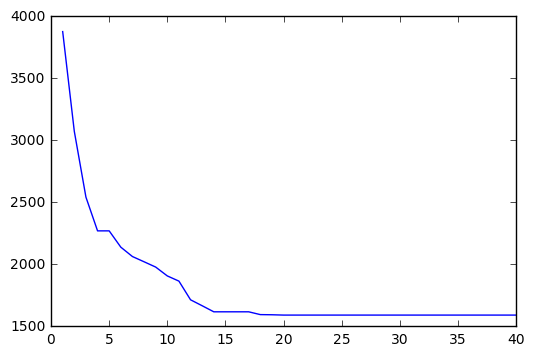

In [32]:
# We will use 'curb-weight', 'width', and 'city-mpg'

k_values = list(range(1, 41))

lowest_rmses = list()
k_lowest_rmse = dict()
lowest_rmse = None
rmses = list()
for k in k_values:
    rmse = knn_train_test(['curb-weight', 'width', 'city-mpg'], normalized_cars, k)
    rmses.append(rmse)
    # Initialize lowest_rmse to the rmse from the first k value
    if k == 1:
        lowest_rmse = rmse
    else:
        # Regular case: check if rmse is lower than lowest_rmse
        if rmse < lowest_rmse:
            lowest_rmse = rmse
    lowest_rmses.append(lowest_rmse)
    k_lowest_rmse[k] = lowest_rmse
print(k_lowest_rmse)
plt.plot(k_values, lowest_rmses)

Using 3 columns improves the RMSE result from the previous trial that used 2 columns. Now we achieve RMSE of 1591.6031978198412 at k=20. It is, however, still slightly higher than our lowest RMSE of 1546.6416642056738.

Now we want to try using 4 columns: 'curb-weight', 'width', 'city-mpg', and 'highway-mpg'

{1: 3706.6936679844293, 2: 2459.0004583794498, 3: 2404.0387135017868, 4: 2129.1619278688522, 5: 2129.1619278688522, 6: 2129.1619278688522, 7: 2126.7191397636448, 8: 2052.2215974848305, 9: 2044.8997072959608, 10: 2039.7577907260425, 11: 1979.1968591278462, 12: 1881.4486277379592, 13: 1794.4957597409416, 14: 1777.1988789866762, 15: 1760.4817488098877, 16: 1760.4817488098877, 17: 1717.2818614275629, 18: 1695.8229671204219, 19: 1670.7714991519488, 20: 1670.7714991519488, 21: 1670.7714991519488, 22: 1670.7714991519488, 23: 1670.7714991519488, 24: 1670.7714991519488, 25: 1670.7714991519488, 26: 1670.7714991519488, 27: 1670.7714991519488, 28: 1670.7714991519488, 29: 1670.7714991519488, 30: 1670.7714991519488, 31: 1670.7714991519488, 32: 1670.7714991519488, 33: 1670.7714991519488, 34: 1670.7714991519488, 35: 1670.7714991519488, 36: 1670.7714991519488, 37: 1670.7714991519488, 38: 1670.7714991519488, 39: 1670.7714991519488, 40: 1670.7714991519488}


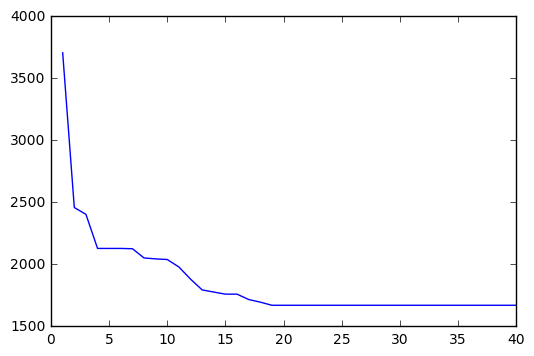

In [33]:
# Using 4 columns:'curb-weight', 'width', 'city-mpg', and 'highway-mpg'

k_values = list(range(1, 41))

lowest_rmses = list()
k_lowest_rmse = dict()
lowest_rmse = None
rmses = list()
for k in k_values:
    rmse = knn_train_test(['curb-weight', 'width', 'city-mpg', 'highway-mpg'], normalized_cars, k)
    rmses.append(rmse)
    # Initialize lowest_rmse to the rmse from the first k value
    if k == 1:
        lowest_rmse = rmse
    else:
        # Regular case: check if rmse is lower than lowest_rmse
        if rmse < lowest_rmse:
            lowest_rmse = rmse
    lowest_rmses.append(lowest_rmse)
    k_lowest_rmse[k] = lowest_rmse
print(k_lowest_rmse)
plt.plot(k_values, lowest_rmses)

This one turns out to be not that great since the lowest RMSE is 1670.7714991519488, which is much higher than the 3-column trial. But what if we substitute 'highway-mpg' with 'engine-size'?

# Using 4 features

{1: 3366.3290734915508, 2: 2520.2910298217544, 3: 2495.4802538425361, 4: 2299.0423270934448, 5: 2174.8708794015715, 6: 2094.3198829287403, 7: 2094.3198829287403, 8: 2094.3198829287403, 9: 2074.4634627181085, 10: 1941.5358333652714, 11: 1858.8338239210568, 12: 1858.8338239210568, 13: 1811.3021724962896, 14: 1811.3021724962896, 15: 1811.3021724962896, 16: 1811.3021724962896, 17: 1811.3021724962896, 18: 1811.3021724962896, 19: 1806.7916179679894, 20: 1806.7916179679894, 21: 1806.7916179679894, 22: 1806.7916179679894, 23: 1806.7916179679894, 24: 1806.7916179679894, 25: 1806.7916179679894, 26: 1806.7916179679894, 27: 1806.7916179679894, 28: 1806.7916179679894, 29: 1806.7916179679894, 30: 1806.7916179679894, 31: 1806.7916179679894, 32: 1806.7916179679894, 33: 1806.7916179679894, 34: 1806.7916179679894, 35: 1806.7916179679894, 36: 1806.7916179679894, 37: 1806.7916179679894, 38: 1806.7916179679894, 39: 1806.7916179679894, 40: 1806.7916179679894}


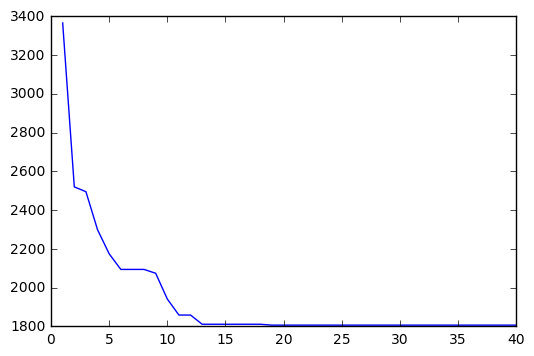

In [34]:
# Using 4 columns: 'curb-weight', 'width', 'city-mpg', and 'engine-size'

k_values = list(range(1, 41))

lowest_rmses = list()
k_lowest_rmse = dict()
lowest_rmse = None
rmses = list()
for k in k_values:
    rmse = knn_train_test(['curb-weight', 'width', 'city-mpg', 'engine-size'], normalized_cars, k)
    rmses.append(rmse)
    # Initialize lowest_rmse to the rmse from the first k value
    if k == 1:
        lowest_rmse = rmse
    else:
        # Regular case: check if rmse is lower than lowest_rmse
        if rmse < lowest_rmse:
            lowest_rmse = rmse
    lowest_rmses.append(lowest_rmse)
    k_lowest_rmse[k] = lowest_rmse
print(k_lowest_rmse)
plt.plot(k_values, lowest_rmses)

# Using 5 features

This trial generates an even higher RMSE. Now we want to see if including both 'engine-size' and 'highway-mpg' would lower the RMSE.

{1: 2818.7583962716144, 2: 2277.8217087974567, 3: 2277.8217087974567, 4: 2211.4349628301497, 5: 2195.4175859165662, 6: 2195.4175859165662, 7: 2171.8860688487125, 8: 2171.8860688487125, 9: 2156.857567088839, 10: 2070.316538808032, 11: 2006.2976661412595, 12: 1979.9158077058348, 13: 1938.7938160176705, 14: 1870.7128532112029, 15: 1844.5787703014321, 16: 1817.9385181069567, 17: 1817.9385181069567, 18: 1817.9385181069567, 19: 1817.9385181069567, 20: 1817.9385181069567, 21: 1817.9385181069567, 22: 1817.9385181069567, 23: 1817.9385181069567, 24: 1817.9385181069567, 25: 1817.9385181069567, 26: 1817.9385181069567, 27: 1817.9385181069567, 28: 1817.9385181069567, 29: 1817.9385181069567, 30: 1817.9385181069567, 31: 1817.9385181069567, 32: 1817.9385181069567, 33: 1817.9385181069567, 34: 1817.9385181069567, 35: 1817.9385181069567, 36: 1817.9385181069567, 37: 1817.9385181069567, 38: 1817.9385181069567, 39: 1817.9385181069567, 40: 1817.9385181069567}


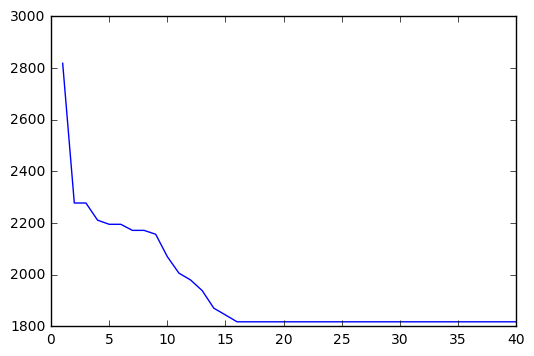

In [35]:
k_values = list(range(1, 41))

lowest_rmses = list()
k_lowest_rmse = dict()
lowest_rmse = None
rmses = list()
for k in k_values:
    rmse = knn_train_test(['curb-weight', 'width', 'city-mpg', 'engine-size', 'highway-mpg'], normalized_cars, k)
    rmses.append(rmse)
    # Initialize lowest_rmse to the rmse from the first k value
    if k == 1:
        lowest_rmse = rmse
    else:
        # Regular case: check if rmse is lower than lowest_rmse
        if rmse < lowest_rmse:
            lowest_rmse = rmse
    lowest_rmses.append(lowest_rmse)
    k_lowest_rmse[k] = lowest_rmse
print(k_lowest_rmse)
plt.plot(k_values, lowest_rmses)

We see that using 5 columns does not lower the RMSE as it plateaus at 1817.9385181069567. 

It looks like using the train-test split, the lowest RMSE that we can achieve so far is 1546.6416642056738 by using all features and k of 20. We want to know how different the result is if we use k-fold cross validation.

# Feature Selection

We want to try to select features that are highly correlated to 'price' in the hope of improving our model.

{1: 4075.830131227342, 2: 3617.9220198035378, 3: 3135.6174130946974, 4: 2938.346504773062, 5: 2850.0597998565959, 6: 2850.0597998565959, 7: 2850.0597998565959, 8: 2850.0597998565959, 9: 2843.9024905386232, 10: 2756.1599878491616, 11: 2739.8370561378965, 12: 2706.8357964780257, 13: 2654.1545252738829, 14: 2654.1545252738829, 15: 2654.1545252738829, 16: 2654.1545252738829, 17: 2654.1545252738829, 18: 2628.0603756008582, 19: 2578.655475314356, 20: 2573.9345923822675, 21: 2539.0797010726947, 22: 2484.1425707414087, 23: 2450.5802451204472, 24: 2407.809529670521, 25: 2405.9502953389083, 26: 2360.3704987402293, 27: 2345.0746395303809, 28: 2345.0746395303809, 29: 2345.0746395303809, 30: 2345.0746395303809, 31: 2345.0746395303809, 32: 2343.9060273460113, 33: 2339.774978859215, 34: 2339.774978859215, 35: 2339.774978859215, 36: 2339.774978859215, 37: 2339.774978859215, 38: 2339.774978859215, 39: 2339.774978859215, 40: 2329.7826633458162}


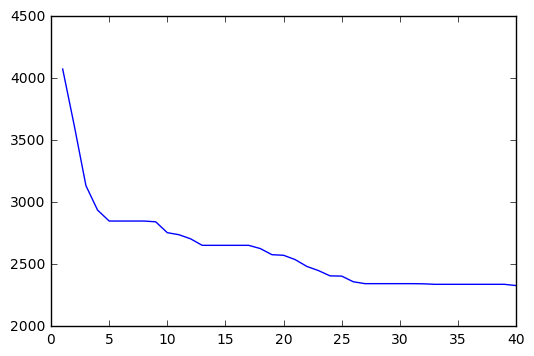

In [36]:
# We will modify the knn_train_test()

def knn_train_test(col_names, df, k):
    for col in col_names:
        if df[col].dtype != 'float64':
            print("Type Error. Please enter numeric values.")
            return
        elif col not in df.columns:
            print("Error. DataFrame does not contain column with such name.")
            return
    # We want train data to be 70% and test data 30%.
    cutoff_index = int(0.7 * df.shape[0])
    train_df = df.iloc[:cutoff_index]
    test_df = df.iloc[cutoff_index:]
    
    # find the best 2 features
    corr = train_df.corr()['price'][train_df.corr()['price'] < 1].abs()
    corr.sort_values(ascending=False, inplace=True)
    features = corr.index[[0,1]].values

    # use these features to train
    train_set = train_df[features].values
    train_target = train_df['price']
    test_set = test_df[features].values
    
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(train_set, train_target)
    predictions = model.predict(test_set)
    mse = mean_squared_error(test_df['price'], predictions)
    rmse = np.sqrt(mse)
    return rmse

k_values = list(range(1,41))
lowest_rmses = list()
k_lowest_rmse = dict()
lowest_rmse = None
rmses = list()
for k in k_values:
    rmse = knn_train_test(numeric_cols, normalized_cars, k)
    rmses.append(rmse)
    # Initialize lowest_rmse to the rmse from the first k value
    if k == 1:
        lowest_rmse = rmse
    else:
        # Regular case: check if rmse is lower than lowest_rmse
        if rmse < lowest_rmse:
            lowest_rmse = rmse
    lowest_rmses.append(lowest_rmse)
    k_lowest_rmse[k] = lowest_rmse

print(k_lowest_rmse)
plt.plot(k_values, lowest_rmses)

It looks like our model with 2 best features generates the lowest RMSE of 2339.774978859215 with k=33. We want to try if increasing the number of features to 3 would improve the result.

{1: 3361.3713975717997, 2: 3084.205257268964, 3: 3084.205257268964, 4: 3049.1015557724199, 5: 2666.3175043105994, 6: 2582.6626452327178, 7: 2539.2910644771914, 8: 2519.7435954155994, 9: 2460.2483926795721, 10: 2400.4050488658554, 11: 2400.4050488658554, 12: 2400.4050488658554, 13: 2400.4050488658554, 14: 2343.6947510166501, 15: 2265.1230581374043, 16: 2232.3751080663446, 17: 2109.8146185706742, 18: 2075.9556189509399, 19: 2043.5855684659678, 20: 2029.1503269693092, 21: 2007.7504597709872, 22: 2003.204092574226, 23: 2003.204092574226, 24: 2003.204092574226, 25: 2003.204092574226, 26: 2003.204092574226, 27: 2003.204092574226, 28: 2003.204092574226, 29: 2003.204092574226, 30: 2003.204092574226, 31: 2003.204092574226, 32: 2003.204092574226, 33: 2003.204092574226, 34: 2003.204092574226, 35: 2003.204092574226, 36: 2003.204092574226, 37: 2003.204092574226, 38: 2003.204092574226, 39: 2003.204092574226, 40: 2003.204092574226}


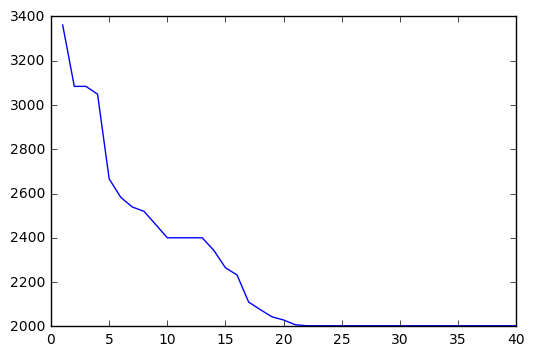

In [37]:
# We will modify the knn_train_test()

def knn_train_test(col_names, df, k):
    for col in col_names:
        if df[col].dtype != 'float64':
            print("Type Error. Please enter numeric values.")
            return
        elif col not in df.columns:
            print("Error. DataFrame does not contain column with such name.")
            return
    # We want train data to be 70% and test data 30%.
    cutoff_index = int(0.7 * df.shape[0])
    train_df = df.iloc[:cutoff_index]
    test_df = df.iloc[cutoff_index:]
    
    # find the best 3 features
    corr = train_df.corr()['price'][train_df.corr()['price'] < 1].abs()
    corr.sort_values(ascending=False, inplace=True)
    features = corr.index[[0,1,2]].values

    # use these features to train
    train_set = train_df[features].values
    train_target = train_df['price']
    test_set = test_df[features].values
    
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(train_set, train_target)
    predictions = model.predict(test_set)
    mse = mean_squared_error(test_df['price'], predictions)
    rmse = np.sqrt(mse)
    return rmse

k_values = list(range(1,41))
lowest_rmses = list()
k_lowest_rmse = dict()
lowest_rmse = None
rmses = list()
for k in k_values:
    rmse = knn_train_test(numeric_cols, normalized_cars, k)
    rmses.append(rmse)
    # Initialize lowest_rmse to the rmse from the first k value
    if k == 1:
        lowest_rmse = rmse
    else:
        # Regular case: check if rmse is lower than lowest_rmse
        if rmse < lowest_rmse:
            lowest_rmse = rmse
    lowest_rmses.append(lowest_rmse)
    k_lowest_rmse[k] = lowest_rmse

print(k_lowest_rmse)
plt.plot(k_values, lowest_rmses)

It does improve the result, lowering the RMSE to 2003.204092574226. What if we used 4 best features?

{1: 4056.792437297026, 2: 3070.388750237697, 3: 3050.8055581501494, 4: 3003.1023032799794, 5: 2730.990873354363, 6: 2566.2614254093564, 7: 2523.9368275434272, 8: 2429.586220502496, 9: 2379.7427300124805, 10: 2318.6627223466548, 11: 2262.1521643443989, 12: 2157.7040290465234, 13: 2027.4899795360163, 14: 1993.3538925488067, 15: 1967.2497716900514, 16: 1946.0979069692864, 17: 1946.0979069692864, 18: 1946.0979069692864, 19: 1946.0979069692864, 20: 1946.0979069692864, 21: 1946.0979069692864, 22: 1946.0979069692864, 23: 1946.0979069692864, 24: 1946.0979069692864, 25: 1946.0979069692864, 26: 1946.0979069692864, 27: 1946.0979069692864, 28: 1946.0979069692864, 29: 1946.0979069692864, 30: 1946.0979069692864, 31: 1946.0979069692864, 32: 1946.0979069692864, 33: 1946.0979069692864, 34: 1946.0979069692864, 35: 1946.0979069692864, 36: 1946.0979069692864, 37: 1946.0979069692864, 38: 1946.0979069692864, 39: 1946.0979069692864, 40: 1946.0979069692864}


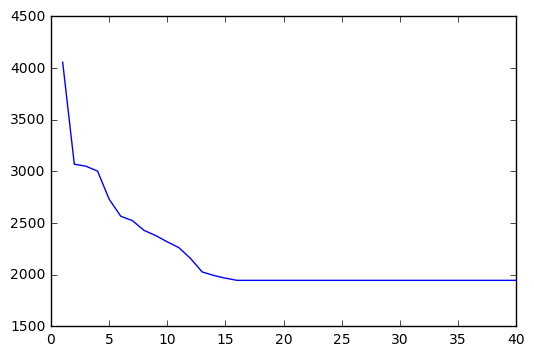

In [38]:
# We will modify the knn_train_test()

def knn_train_test(col_names, df, k):
    for col in col_names:
        if df[col].dtype != 'float64':
            print("Type Error. Please enter numeric values.")
            return
        elif col not in df.columns:
            print("Error. DataFrame does not contain column with such name.")
            return
    # We want train data to be 70% and test data 30%.
    cutoff_index = int(0.7 * df.shape[0])
    train_df = df.iloc[:cutoff_index]
    test_df = df.iloc[cutoff_index:]
    
    # find the best 4 features
    corr = train_df.corr()['price'][train_df.corr()['price'] < 1].abs()
    corr.sort_values(ascending=False, inplace=True)
    features = corr.index[[0,1,2,3]].values

    # use these features to train
    train_set = train_df[features].values
    train_target = train_df['price']
    test_set = test_df[features].values
    
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(train_set, train_target)
    predictions = model.predict(test_set)
    mse = mean_squared_error(test_df['price'], predictions)
    rmse = np.sqrt(mse)
    return rmse

k_values = list(range(1,41))
lowest_rmses = list()
k_lowest_rmse = dict()
lowest_rmse = None
rmses = list()
for k in k_values:
    rmse = knn_train_test(numeric_cols, normalized_cars, k)
    rmses.append(rmse)
    # Initialize lowest_rmse to the rmse from the first k value
    if k == 1:
        lowest_rmse = rmse
    else:
        # Regular case: check if rmse is lower than lowest_rmse
        if rmse < lowest_rmse:
            lowest_rmse = rmse
    lowest_rmses.append(lowest_rmse)
    k_lowest_rmse[k] = lowest_rmse

print(k_lowest_rmse)
plt.plot(k_values, lowest_rmses)

Using 4 best features lowers the RMSE to 1946.0979069692864, a slight improvement from 2003.204092574226.

{1: 2818.7583962716144, 2: 2277.8217087974567, 3: 2277.8217087974567, 4: 2211.4349628301497, 5: 2195.4175859165662, 6: 2195.4175859165662, 7: 2171.8860688487125, 8: 2171.8860688487125, 9: 2156.857567088839, 10: 2070.316538808032, 11: 2006.2976661412595, 12: 1979.9158077058348, 13: 1938.7938160176705, 14: 1870.7128532112029, 15: 1844.5787703014321, 16: 1817.9385181069567, 17: 1817.9385181069567, 18: 1817.9385181069567, 19: 1817.9385181069567, 20: 1817.9385181069567, 21: 1817.9385181069567, 22: 1817.9385181069567, 23: 1817.9385181069567, 24: 1817.9385181069567, 25: 1817.9385181069567, 26: 1817.9385181069567, 27: 1817.9385181069567, 28: 1817.9385181069567, 29: 1817.9385181069567, 30: 1817.9385181069567, 31: 1817.9385181069567, 32: 1817.9385181069567, 33: 1817.9385181069567, 34: 1817.9385181069567, 35: 1817.9385181069567, 36: 1817.9385181069567, 37: 1817.9385181069567, 38: 1817.9385181069567, 39: 1817.9385181069567, 40: 1817.9385181069567}


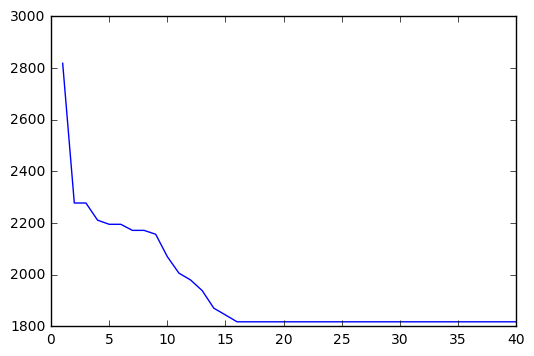

In [39]:
# We will modify the knn_train_test()

def knn_train_test(col_names, df, k):
    for col in col_names:
        if df[col].dtype != 'float64':
            print("Type Error. Please enter numeric values.")
            return
        elif col not in df.columns:
            print("Error. DataFrame does not contain column with such name.")
            return
    # We want train data to be 70% and test data 30%.
    cutoff_index = int(0.7 * df.shape[0])
    train_df = df.iloc[:cutoff_index]
    test_df = df.iloc[cutoff_index:]
    
    # find the best 5 features
    corr = train_df.corr()['price'][train_df.corr()['price'] < 1].abs()
    corr.sort_values(ascending=False, inplace=True)
    features = corr.index[[0,1,2,3,4]].values

    # use these features to train
    train_set = train_df[features].values
    train_target = train_df['price']
    test_set = test_df[features].values
    
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(train_set, train_target)
    predictions = model.predict(test_set)
    mse = mean_squared_error(test_df['price'], predictions)
    rmse = np.sqrt(mse)
    return rmse

k_values = list(range(1,41))
lowest_rmses = list()
k_lowest_rmse = dict()
lowest_rmse = None
rmses = list()
for k in k_values:
    rmse = knn_train_test(numeric_cols, normalized_cars, k)
    rmses.append(rmse)
    # Initialize lowest_rmse to the rmse from the first k value
    if k == 1:
        lowest_rmse = rmse
    else:
        # Regular case: check if rmse is lower than lowest_rmse
        if rmse < lowest_rmse:
            lowest_rmse = rmse
    lowest_rmses.append(lowest_rmse)
    k_lowest_rmse[k] = lowest_rmse

print(k_lowest_rmse)
plt.plot(k_values, lowest_rmses)

And using 5 features improves it further, to 1817.9385181069567. 

{1: 3158.768698346742, 2: 2438.102370308402, 3: 2165.4267261051036, 4: 2144.5196163006472, 5: 2144.5196163006472, 6: 2144.5196163006472, 7: 2144.5196163006472, 8: 2050.1751132236154, 9: 1991.4900772427898, 10: 1872.6797150073476, 11: 1806.0459485363504, 12: 1732.3715044913879, 13: 1732.3715044913879, 14: 1732.3715044913879, 15: 1732.3715044913879, 16: 1732.3715044913879, 17: 1732.3715044913879, 18: 1732.3715044913879, 19: 1732.3715044913879, 20: 1732.3715044913879}


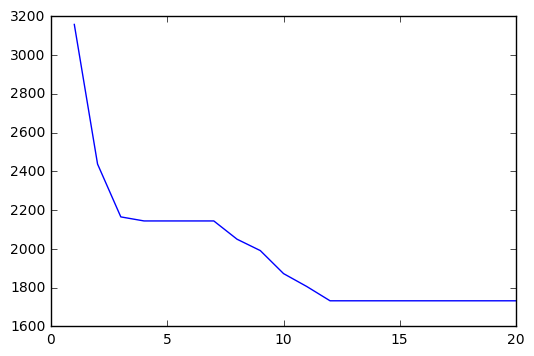

In [40]:
# We will modify the knn_train_test()

def knn_train_test(col_names, df, k):
    for col in col_names:
        if df[col].dtype != 'float64':
            print("Type Error. Please enter numeric values.")
            return
        elif col not in df.columns:
            print("Error. DataFrame does not contain column with such name.")
            return
    # We want train data to be 70% and test data 30%.
    cutoff_index = int(0.7 * df.shape[0])
    train_df = df.iloc[:cutoff_index]
    test_df = df.iloc[cutoff_index:]
    
    # find the best 6 features
    corr = train_df.corr()['price'][train_df.corr()['price'] < 1].abs()
    corr.sort_values(ascending=False, inplace=True)
    features = corr.index[[0,1,2,3,4,5]].values

    # use these features to train
    train_set = train_df[features].values
    train_target = train_df['price']
    test_set = test_df[features].values
    
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(train_set, train_target)
    predictions = model.predict(test_set)
    mse = mean_squared_error(test_df['price'], predictions)
    rmse = np.sqrt(mse)
    return rmse

k_values = list(range(1,21))
lowest_rmses = list()
k_lowest_rmse = dict()
lowest_rmse = None
rmses = list()
for k in k_values:
    rmse = knn_train_test(numeric_cols, normalized_cars, k)
    rmses.append(rmse)
    # Initialize lowest_rmse to the rmse from the first k value
    if k == 1:
        lowest_rmse = rmse
    else:
        # Regular case: check if rmse is lower than lowest_rmse
        if rmse < lowest_rmse:
            lowest_rmse = rmse
    lowest_rmses.append(lowest_rmse)
    k_lowest_rmse[k] = lowest_rmse

print(k_lowest_rmse)
plt.plot(k_values, lowest_rmses)

Using 6 features generates an RMSE of 1732.3715044913879, another improvement.

{1: 4092.3551751174218, 2: 2749.9169250774808, 3: 2550.9441858777709, 4: 2336.698826372884, 5: 2247.825029391438, 6: 2065.9681852885637, 7: 2015.3372498099416, 8: 1947.8553857992304, 9: 1947.8553857992304, 10: 1933.7849699488308, 11: 1933.7849699488308, 12: 1877.1565302681481, 13: 1790.5526257757163, 14: 1784.8483660611353, 15: 1784.8483660611353, 16: 1784.8483660611353, 17: 1784.8483660611353, 18: 1784.8483660611353, 19: 1784.8483660611353, 20: 1784.8483660611353}


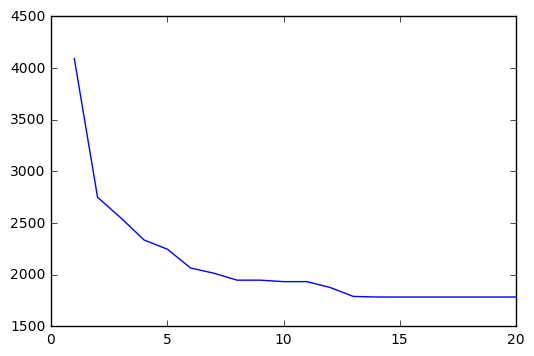

In [41]:
# We will modify the knn_train_test()

def knn_train_test(col_names, df, k):
    for col in col_names:
        if df[col].dtype != 'float64':
            print("Type Error. Please enter numeric values.")
            return
        elif col not in df.columns:
            print("Error. DataFrame does not contain column with such name.")
            return
    # We want train data to be 70% and test data 30%.
    cutoff_index = int(0.7 * df.shape[0])
    train_df = df.iloc[:cutoff_index]
    test_df = df.iloc[cutoff_index:]
    
    # find the best 7 features
    corr = train_df.corr()['price'][train_df.corr()['price'] < 1].abs()
    corr.sort_values(ascending=False, inplace=True)
    features = corr.index[[0,1,2,3,4,5,6]].values

    # use these features to train
    train_set = train_df[features].values
    train_target = train_df['price']
    test_set = test_df[features].values
    
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(train_set, train_target)
    predictions = model.predict(test_set)
    mse = mean_squared_error(test_df['price'], predictions)
    rmse = np.sqrt(mse)
    return rmse

k_values = list(range(1,21))
lowest_rmses = list()
k_lowest_rmse = dict()
lowest_rmse = None
rmses = list()
for k in k_values:
    rmse = knn_train_test(numeric_cols, normalized_cars, k)
    rmses.append(rmse)
    # Initialize lowest_rmse to the rmse from the first k value
    if k == 1:
        lowest_rmse = rmse
    else:
        # Regular case: check if rmse is lower than lowest_rmse
        if rmse < lowest_rmse:
            lowest_rmse = rmse
    lowest_rmses.append(lowest_rmse)
    k_lowest_rmse[k] = lowest_rmse

print(k_lowest_rmse)
plt.plot(k_values, lowest_rmses)

And now since using 7 features increases the RMSE to 1784.8483660611353, it seems we cannot go lower than 1732.3715044913879. Thus, using 6 best features generates the lowest RMSE with k=12.

# K-Fold Cross Validation

We have seen the result using train/test split, but now we want to see if using K-fold cross validation would improve the results.

{1: 4001.561726149941, 2: 3757.2857231003691, 3: 3757.2857231003691, 4: 3757.2857231003691, 5: 3757.2857231003691, 6: 3757.2857231003691, 7: 3757.2857231003691, 8: 3757.2857231003691, 9: 3757.2857231003691, 10: 3757.2857231003691}


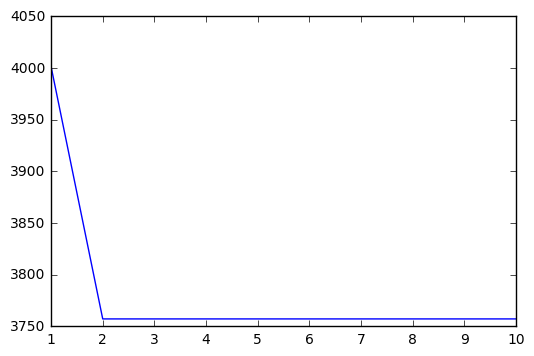

In [42]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


folds = [3, 5, 7, 9, 10, 11, 13, 15, 17, 19, 21, 23]

# Create the function

def knn_kfold(col_names, df, k, folds):
    for col in col_names:
        if df[col].dtype != 'float64':
            print("Type Error. Please enter numeric values.")
            return
        elif col not in df.columns:
            print("Error. DataFrame does not contain column with such name.")
            return


    for fold in folds:
        kf = KFold(n_splits=fold, shuffle=True, random_state=1)
        model = KNeighborsRegressor(n_neighbors=k)
        mses = cross_val_score(model, df[col_names], df["price"], scoring="neg_mean_squared_error", cv=kf)
        rmses = [np.sqrt(np.absolute(mse)) for mse in mses]
        avg_rmse = np.mean(rmses)
        return avg_rmse

k_values = [1,2,3,4,5,6,7,8,9,10]
lowest_avg_rmses = list()
k_lowest_avg_rmse = dict()
lowest_avg_rmse = None
rmses = list()
for k in k_values:
    avg_rmse = knn_kfold(numeric_cols, normalized_cars, k, folds)
    rmses.append(rmse)
    # Initialize lowest_rmse to the rmse from the first k value
    if k == 1:
        lowest_avg_rmse = avg_rmse
    else:
        # Regular case: check if rmse is lower than lowest_rmse
        if avg_rmse < lowest_avg_rmse:
            lowest_avg_rmse = avg_rmse
    lowest_avg_rmses.append(lowest_avg_rmse)
    k_lowest_avg_rmse[k] = lowest_avg_rmse

print(k_lowest_avg_rmse)
plt.plot(k_values, lowest_avg_rmses)

It looks like the avg_rmse using k-fold cross validation is much higher than our current best result. 

# Finding best features to improve our KNN model

We will find the best features, that is, the ones with higher correlation to 'price', and will use them in the training fold.

In [43]:

def knn_kfold(col_names, df, k):
    for col in col_names:
        if df[col].dtype != 'float64':
            print("Type Error. Please enter numeric values.")
            return
        elif col not in df.columns:
            print("Error. DataFrame does not contain column with such name.")
            return
        
    kf = KFold(len(df[col_names])-2, shuffle=True, random_state=1)

    for train, test in kf.split(df[col_names]):
        train_fold = df.iloc[train]
        test_fold = df.iloc[test]
        
        # find the best 2 features
        corr = train_fold.corr()['price'][train_fold.corr()['price'] < 1].abs()
        corr.sort_values(ascending=False, inplace=True)
        features = corr.index[[0,1]].values
        
        # use these features to train
        train_set = train_fold[features].values
        train_target = train_fold['price']

        model = KNeighborsRegressor(n_neighbors=k)
        mses = cross_val_score(model, train_set, train_target, scoring="neg_mean_squared_error", cv=kf)
        rmses = [np.sqrt(np.absolute(mse)) for mse in mses]
        avg_rmse = np.mean(rmses)
        return avg_rmse  
    
avg_rmse_10 = knn_kfold(numeric_cols, normalized_cars, 10)
avg_rmse_10

2225.3497382198948

In [44]:
avg_rmse_3 = knn_kfold(numeric_cols, normalized_cars, 3)
avg_rmse_3

2095.6457242582896

In [45]:
avg_rmse_2 = knn_kfold(numeric_cols, normalized_cars, 2)
avg_rmse_2

1938.8507853403141

It appears that we are onto something by reducing the number of n_neighbors. Now we will try how the number would improve if we increase the number of best features to 3.

In [46]:
def knn_kfold(col_names, df, k):
    for col in col_names:
        if df[col].dtype != 'float64':
            print("Type Error. Please enter numeric values.")
            return
        elif col not in df.columns:
            print("Error. DataFrame does not contain column with such name.")
            return
        
    kf = KFold(len(df[col_names])-2, shuffle=True, random_state=1)

    for train, test in kf.split(df[col_names]):
        train_fold = df.iloc[train]
        test_fold = df.iloc[test]
        
        # find the best 3 features
        corr = train_fold.corr()['price'][train_fold.corr()['price'] < 1].abs()
        corr.sort_values(ascending=False, inplace=True)
        features = corr.index[[0,1,2]].values
        
        # use these features to train
        train_set = train_fold[features].values
        train_target = train_fold['price']

        model = KNeighborsRegressor(n_neighbors=k)
        mses = cross_val_score(model, train_set, train_target, scoring="neg_mean_squared_error", cv=kf)
        rmses = [np.sqrt(np.absolute(mse)) for mse in mses]
        avg_rmse = np.mean(rmses)
        return avg_rmse  
    
avg_rmse_10 = knn_kfold(numeric_cols, normalized_cars, 10)
avg_rmse_10

2120.906282722513

We made an improvement by getting the avg_rmse_10 result of 2120.906282722513, since before we got 2225.3497382198948.

In [47]:
avg_rmse_2 = knn_kfold(numeric_cols, normalized_cars, 2)
avg_rmse_2

1636.0104712041884

Since the model using 2 best features gave us 1938.8507853403141, an avg_rmse_2 of 1636.0104712041884 looks like an improvement.

# Conclusion

We have built KNN models using the train-test and k-fold cross validation methods to predict car prices. Using train-test split, we found that the model using all features and 20 neighbors generated the lowest RMSE of 1546.6416642056738. Using train-test split and feature selection (6 best features) gave an RMSE of 1732.3715044913879.
Our lowest average RMSE using k-fold cross validation with k=2 is 1636.0104712041884. Note that for KNN we used the average RMSE, since the cross validation score is an average of all the RMSEs. 